# Project description

**The project is about an online store Ice, which sells video games all over the world, and I need to identify patterns that determine whether a game succeeds or not. 
My purpose is to spot potential big winners and plan advertising campaigns.
In order to do that,first I have to load the data, restore and clean it as necessary.
I might need to fill missing values with grouping data from more than one column to get more specefied calculations to move forward with the code.**

In [1]:
# Loading all the libraries

import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math
import datetime
from functools import reduce
import seaborn as sns
import matplotlib as mpl

In [1]:
#loading data frames

try: 
    data= pd.read_csv('/datasets/games.csv')

except:
    print('Wrong file')

Wrong file


# Prepare the data

In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
data.shape

(16715, 11)

In [6]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
data.isnull().sum()* 100 / len(data)

Name                0.011965
Platform            0.000000
Year_of_Release     1.609333
Genre               0.011965
NA_sales            0.000000
EU_sales            0.000000
JP_sales            0.000000
Other_sales         0.000000
Critic_Score       51.319174
User_Score         40.089740
Rating             40.478612
dtype: float64

In [9]:
data.duplicated().sum()

0

In [10]:
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


**At first glance we can see that the data is 16715 rows × 11 columns, with missing values in culomns Name, Year_of_release, Genre, Critic_Score, User_Score, Rating. These culomns need further investigation. 
There are no duplicates.
The missing values maybe caused from different reasons like: maybe some people didn't fill the rating, or some games where published but then where taken down.
About the describe including object, the difference between unique and count values is maybe several games were released for only 1 year or for one platform. The most popular game in the data is Need for Speed: Most Wanted.**

# Dealing with missing values, and changing the types

In [11]:
data.dropna(subset = ['Name', 'Genre'], inplace = True)

In [12]:
data['Year_of_Release'].value_counts(ascending = True)

1980.0       9
1985.0      14
1984.0      14
1988.0      15
1990.0      16
1987.0      16
1989.0      17
1983.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: Year_of_Release, dtype: int64

In [13]:
data['Year_of_Release'].fillna('2008', inplace = True)
data['Year_of_Release'] = data['Year_of_Release'].astype('int')

In [14]:
data['User_Score'] = data['User_Score'].replace('tbd', np.nan)
data['User_Score'] = data['User_Score'].astype('float')

In [15]:
data['Critic_Score'] = data['Critic_Score'].astype('float')

In [18]:
data['Rating']=data['Rating'].fillna('unknown')

In [19]:
data.sample(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
10838,Whacked!,XB,2002,Misc,0.07,0.02,0.00,0.00,NaN,NaN,unknown
6529,Frogger's Journey: The Forgotten Relic,GBA,2003,Action,0.18,0.07,0.00,0.00,59.0,NaN,E
14024,Galaxy Fight,SAT,1994,Fighting,0.00,0.00,0.04,0.00,NaN,NaN,unknown
9748,Everybody Dance,PS3,2011,Misc,0.11,0.00,0.00,0.01,66.0,6.8,T
4482,Sleeping Dogs,PS4,2014,Action,0.16,0.20,0.00,0.07,NaN,NaN,unknown


**The column Name and Genre I've decided to drop the missing values because it's only 2 rows in each and in my opinion won't affect the data immensely.**

**About Year of release, since I can't predict what year the game was released I've decided to fill the missing values with '2008'since it's the most common year.**

**User_Score had 'tbd'(another form of missing value), and I used 'np.nan' to change it to Nan so it would be easier for me to deal with the missing values.
There was  alot of data missing , because maybe it was a fresh game and the user scores were not gathered. About the other missing values maybe because it's an old games that throw the years were not filled correctly.** 

**Plus about the data type in Year_of_Release I changed it to 'int'(it was float). 
And changed critic score and user score to float.**

**And the rating I filled it with unknown so it would be easier for me to do the calculations later in the project.**

# Replace the column names

In [20]:
#changing the culomns names to lowercase
data = data.rename(str.lower, axis ='columns')

In [21]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


# The sum of sales in all regions

In [22]:
#sum sales in all regions, new column is 'sum_sales'
data['sum_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


# Games released in different years 

In [23]:
#how many games were released in different years
games_by_year = data[['year_of_release', 'name']].groupby(['year_of_release']).count().sort_values(by='year_of_release', ascending=True).reset_index()
games_by_year = games_by_year[games_by_year['year_of_release'] !=0]
games_by_year

,year_of_release,name
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


<AxesSubplot:xlabel='year_of_release'>

Text(0.5, 1.0, 'year_of_release')

Text(0.5, 0, 'year_of_release')

Text(0, 0.5, 'amount')

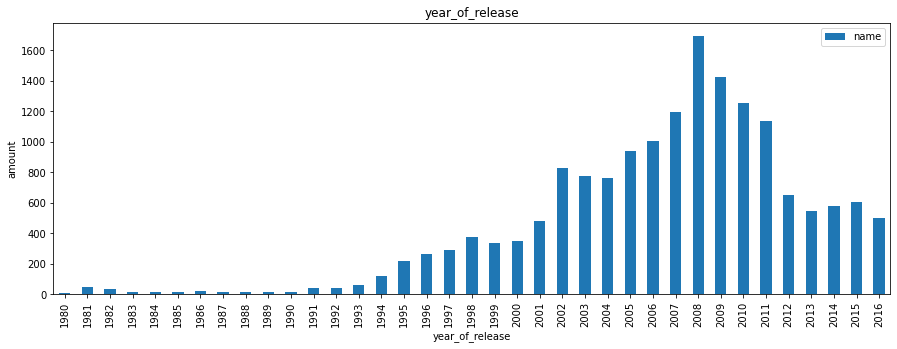

In [24]:
year_of_release_bar = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

year_of_release_bar.plot(kind='bar', figsize=(15,5))
plt.title('year_of_release')
plt.xlabel('year_of_release')
plt.ylabel('amount')
plt.show()

**As we can see in the table above, the sales varied through the years, there was a peak in sales at 2008 and 2009 and right afterwards a decline.**

# How sales varied from platform to platform

In [25]:
#sales varied from platform to platform
platform_sales = data[['platform', 'sum_sales']].groupby(['platform']).sum().sort_values(by='sum_sales').reset_index()
platform_sales

,platform,sum_sales
0,PCFX,0.03
1,GG,0.04
2,3DO,0.10
3,TG16,0.16
4,WS,1.42
5,NG,1.44
6,SCD,1.86
7,DC,15.95
8,GEN,28.35
9,SAT,33.59


**PS2 with the greatest total sales.**

<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

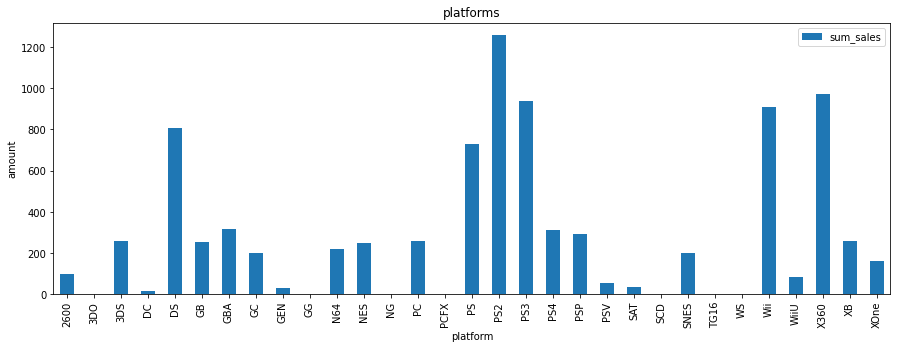

In [26]:
platform_bar = data.pivot_table(index='platform', values='sum_sales', aggfunc='sum')

platform_bar.plot(kind='bar', figsize=(15,5))
plt.title('platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

**This graph shows us which platforms are the most poular acording to their sales, we can see that PS2 is the highest, right after it PS3 and X360**

In [27]:
#How long does it generally take for new platforms to appear and old ones to fade?

platform_by_year = data[data['year_of_release'] >= 2011]
platforms_length = platform_by_year.groupby(['platform'])['year_of_release'].agg(['min','max'])
platforms_length['length'] = platforms_length['max'] - platforms_length['min']
platforms_length.sort_values(by='min').reset_index()
median = platforms_length['length'].median()
print(f'The platforms length is {median}')


,platform,min,max,length
0,3DS,2011,2016,5
1,DS,2011,2013,2
2,PC,2011,2016,5
3,PS2,2011,2011,0
4,PS3,2011,2016,5
5,PSP,2011,2015,4
6,PSV,2011,2016,5
7,Wii,2011,2016,5
8,X360,2011,2016,5
9,WiiU,2012,2016,4


The platforms length is 4.5


**Pc, X360, Wii, PS3, PSP, PS2 are the oldest platforms, since their age is around 10-11 years. And there are platforms that lasted about a year or less.**


In [28]:
profit_year=pd.pivot_table(platform_by_year,index='year_of_release',columns='platform',values='sum_sales',aggfunc='sum',fill_value=0)
profit_year.tail()

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2012,51.36,11.01,23.22,0.0,107.36,0.00,7.69,16.19,21.71,17.56,99.74,0.00
2013,56.57,1.54,12.38,0.0,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
2014,43.76,0.00,13.28,0.0,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2015,27.78,0.00,8.52,0.0,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,0.00,5.25,0.0,3.60,69.25,0.00,4.25,0.18,4.60,1.52,26.15


In [29]:
profit_year_shift = profit_year.shift(+1)

profit_year_wanted= profit_year - profit_year_shift
profit_year_wanted

platform,3DS,DS,PC,PS2,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,,
2011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,-11.84,-15.17,-11.81,-0.45,-49.42,0.00,-10.13,11.56,-37.94,17.56,-44.10,0.00
2013,5.21,-9.47,-10.84,0.00,5.89,25.99,-4.55,-5.60,-13.12,4.09,-11.16,18.96
2014,-12.81,-1.54,0.90,0.00,-65.49,74.01,-2.90,1.31,-4.84,0.38,-53.84,35.11
2015,-15.98,0.00,-4.76,0.00,-30.94,18.90,-0.12,-5.65,-2.61,-5.68,-22.78,6.07
2016,-12.64,0.00,-3.27,0.00,-13.22,-49.65,-0.12,-2.00,-0.96,-11.75,-10.44,-33.99


<Figure size 1080x648 with 0 Axes>

<AxesSubplot:xlabel='platform', ylabel='year_of_release'>

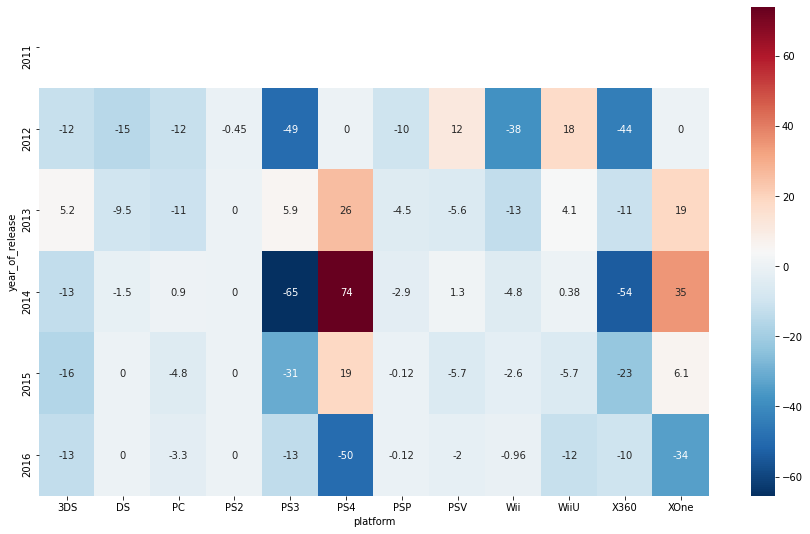

In [30]:
plt.figure(figsize=(15,9))
sns.heatmap(profit_year_wanted, cmap='RdBu_r', annot=True)

**From this plot we can see how much does it take to a platform to fade. Whenever there is '0' that mean that the platform isn't active. 
For example PS3 has been active since 2006, although it has minus but at least it's still active and didn't fade like others.
potentially profitable platforms 3DS, PC, PS3, Wii.**

# Build a box plot for the global sales of all games

<Figure size 720x576 with 0 Axes>

<AxesSubplot:xlabel='platform', ylabel='sum_sales'>

Text(0.5, 1.0, 'revenue per platforms')

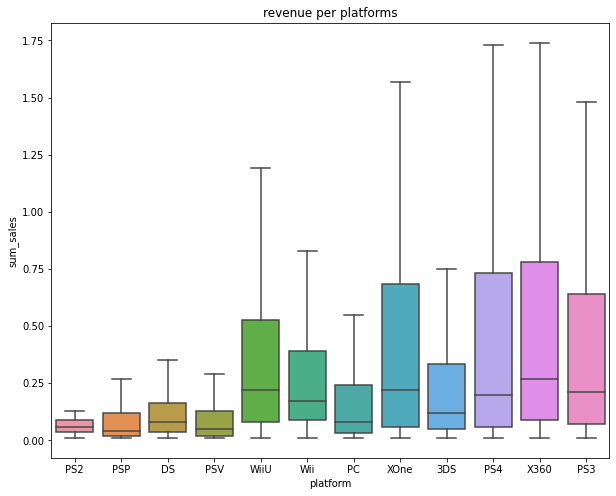

In [31]:
grouped_games = platform_by_year.groupby(['platform'])['sum_sales'].sum().reset_index().sort_values(by='sum_sales')['platform']

plt.figure(figsize=(10,8))
sns.boxplot(x='platform', y='sum_sales', data=platform_by_year,order=grouped_games, showfliers=False)
plt.title('revenue per platforms')
plt.show ()

**PS2, X360, PS3, Wii have the highest revenue.**

# scatter plot 

In [32]:
scatter_platform = platform_by_year.query('platform == "PS3"')
scatter_platform


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M,13.33
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
16638,Tour de France 2014,PS3,2014,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01


array([[<AxesSubplot:xlabel='year_of_release', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='na_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='other_sales', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='critic_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='user_score', ylabel='year_of_release'>,
        <AxesSubplot:xlabel='sum_sales', ylabel='year_of_release'>],
       [<AxesSubplot:xlabel='year_of_release', ylabel='na_sales'>,
        <AxesSubplot:xlabel='na_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='eu_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='jp_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='other_sales', ylabel='na_sales'>,
        <AxesSubplot:xlabel='critic_score', ylabel='na_sales'>,
        <AxesSubplot:xlabel='user_score', ylabel='na_sales'>,
        <A

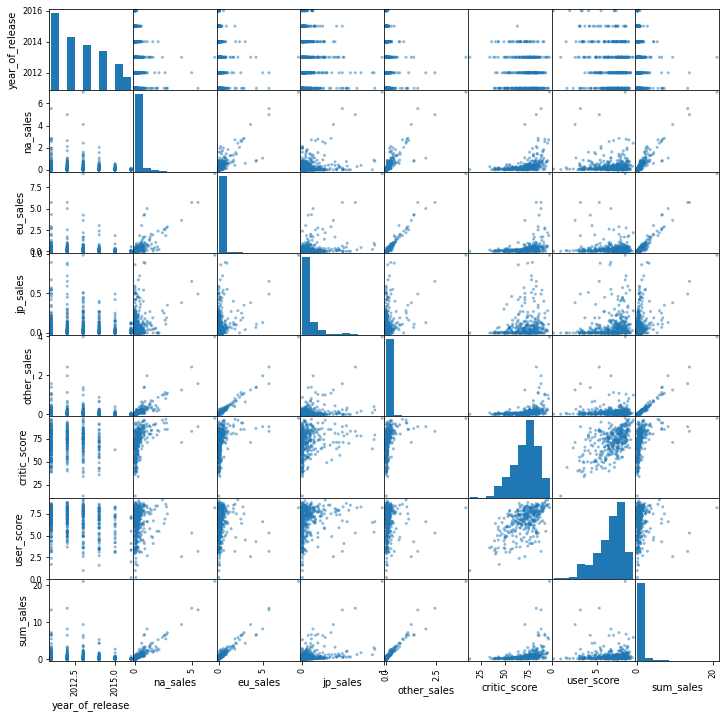

In [33]:
scatter_platform2 = scatter_platform.pivot_table(index ='platform',values = 'sum_sales').sum().reset_index()
pd.plotting.scatter_matrix(scatter_platform, figsize=(12, 12))


**Here we can see the revenue of PS3, is it positive or negative relationship.
PS3 is leading so I chose it randomly, for example if we take sum sales with years of release, we can see that it's a positive relationship and what we can cunclode that movinig forward with the years we have more sales in PS3**

<AxesSubplot:>

Text(0.5, 1.0, 'mean sales X genre')

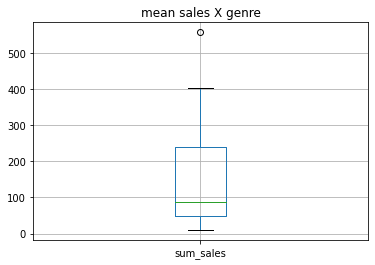

In [34]:
mean_sales_genre = platform_by_year.groupby('genre')['sum_sales'].sum().reset_index().sort_values(by='sum_sales', ascending=False)
mean_sales_genre.boxplot('sum_sales')
plt.title('mean sales X genre')
plt.show()

<Figure size 864x864 with 0 Axes>

<AxesSubplot:xlabel='genre', ylabel='sum_sales'>

Text(0.5, 1.0, 'revenue per genres')

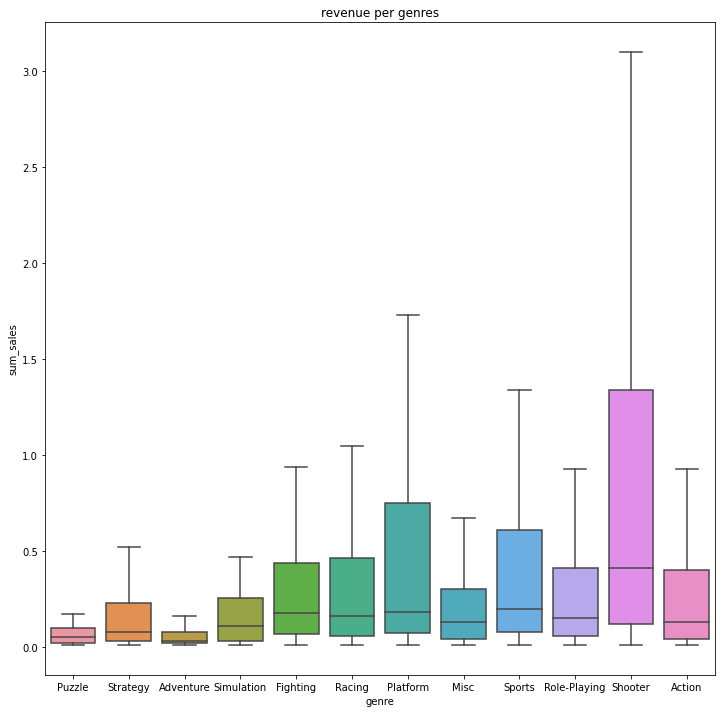

In [35]:
grouped_games2 = platform_by_year.groupby(['genre'])['sum_sales'].sum().reset_index().sort_values(by='sum_sales')['genre']

plt.figure(figsize=(12,12))
sns.boxplot(x='genre', y='sum_sales', data=platform_by_year,order=grouped_games2, showfliers=False)
plt.title('revenue per genres')
plt.show ()

**A plot with all genres, we can see that 'Shooter' has the highest revenue.**

# For each region (NA, EU, JP), determine:

,platform,na_sales
28,X360,602.47
16,PS2,583.84
26,Wii,496.90
17,PS3,393.49
4,DS,382.40


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'na platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

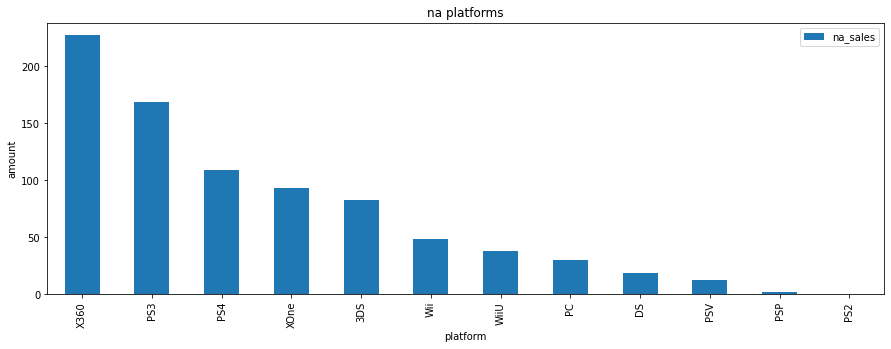

In [36]:
#The top five platforms in NA
na_platform = data.groupby(['platform'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)

na_platform.head()

platforms_na_pivot = platform_by_year.pivot_table(index='platform',values='na_sales', aggfunc='sum').sort_values(by=['na_sales'],ascending=False)
platforms_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('na platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

**Top platforms in NA that brings the most money to the counrty, we can see that X360 is the highest**

,platform,eu_sales
16,PS2,339.29
17,PS3,330.29
28,X360,270.76
26,Wii,262.21
15,PS,213.61


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'eu platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

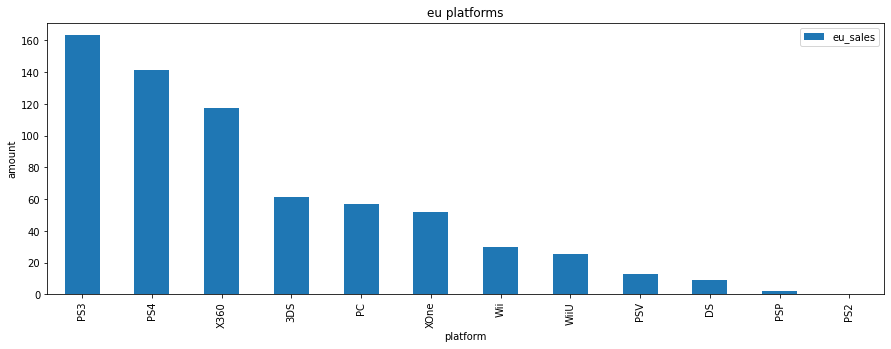

In [37]:
#The top five platforms in EU
eu_platform = data.groupby(['platform'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)

eu_platform.head()

platforms_eu_pivot = platform_by_year.pivot_table(index='platform',values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'],ascending=False)
platforms_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('eu platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

**Top platforms in EU that brings the most money to the counrty, here we can that PS3 is the highest.**

,platform,jp_sales
4,DS,175.57
15,PS,139.82
16,PS2,139.20
23,SNES,116.55
2,3DS,100.67


<AxesSubplot:xlabel='platform'>

Text(0.5, 1.0, 'jp platforms')

Text(0.5, 0, 'platform')

Text(0, 0.5, 'amount')

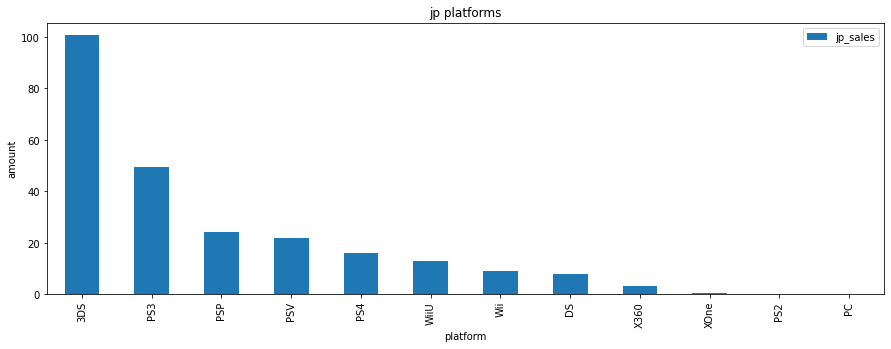

In [38]:
#The top five platforms in JP
jp_platform = data.groupby(['platform'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)

jp_platform.head()

platforms_jp_pivot = platform_by_year.pivot_table(index='platform',values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'],ascending=False)
platforms_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('jp platforms')
plt.xlabel('platform')
plt.ylabel('amount')
plt.show()

**Top platforms in JP that brings the most money to the counrty, here we can that 3DS is the highest.**

**Top platforms in JP that brings the most money to the counrty**

In [39]:
data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()

/tmp/ipykernel_133/2883726780.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['platform'])['na_sales','jp_sales','eu_sales'].sum().reset_index()


,platform,na_sales,jp_sales,eu_sales
0,2600,90.60,0.00,5.47
1,3DO,0.00,0.10,0.00
2,3DS,83.49,100.67,61.48
3,DC,5.43,8.56,1.69
4,DS,382.40,175.57,188.89
5,GB,114.32,85.12,47.82
6,GBA,187.54,47.33,75.25
7,GC,133.46,21.58,38.71
8,GEN,19.27,2.67,5.52
9,GG,0.00,0.04,0.00


**combining the countries together to check out the distribution of each platform**

,genre,na_sales
0,Action,879.01
10,Sports,684.43
8,Shooter,592.24
4,Platform,445.50
3,Misc,407.27


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'na genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

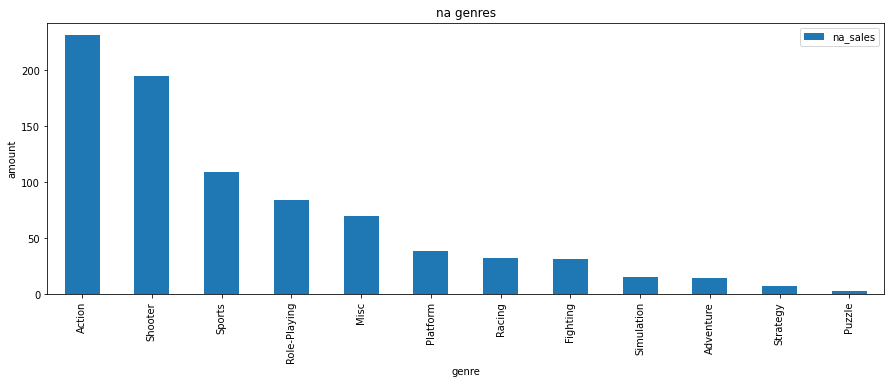

In [40]:
#The top five genres in NA
na_genre = data.groupby(['genre'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)

na_genre.head()

genres_na_pivot = platform_by_year.pivot_table(index='genre',values='na_sales', aggfunc='sum').sort_values(by=['na_sales'],ascending=False)
genres_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('na genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

**Top genres in NA that brings the most money to the counrty, here we can see that ACTION is the highest.**

,genre,eu_sales
0,Action,519.13
10,Sports,376.79
8,Shooter,317.34
6,Racing,236.51
3,Misc,212.74


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'eu genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

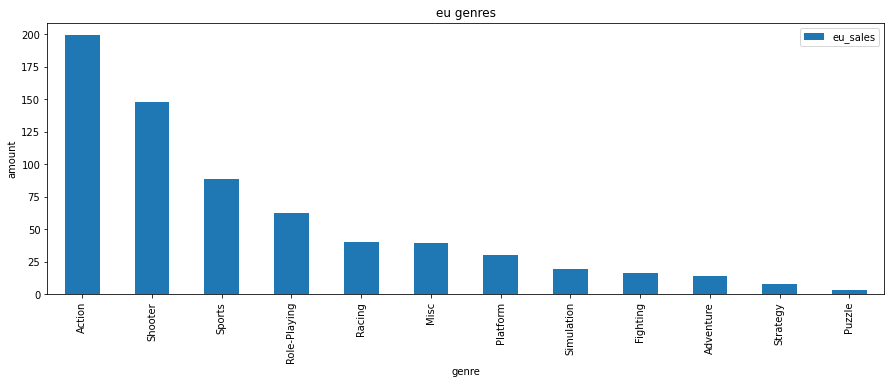

In [41]:
#The top five genres in EU
eu_genre = data.groupby(['genre'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)

eu_genre.head()

genres_eu_pivot = platform_by_year.pivot_table(index='genre',values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'],ascending=False)
genres_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('eu genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

**Top genres in EU that brings the most money to the counrty, here we can see that ACTION is the highest.**

,genre,jp_sales
7,Role-Playing,355.41
0,Action,161.43
10,Sports,135.54
4,Platform,130.83
3,Misc,108.11


<AxesSubplot:xlabel='genre'>

Text(0.5, 1.0, 'jp genres')

Text(0.5, 0, 'genre')

Text(0, 0.5, 'amount')

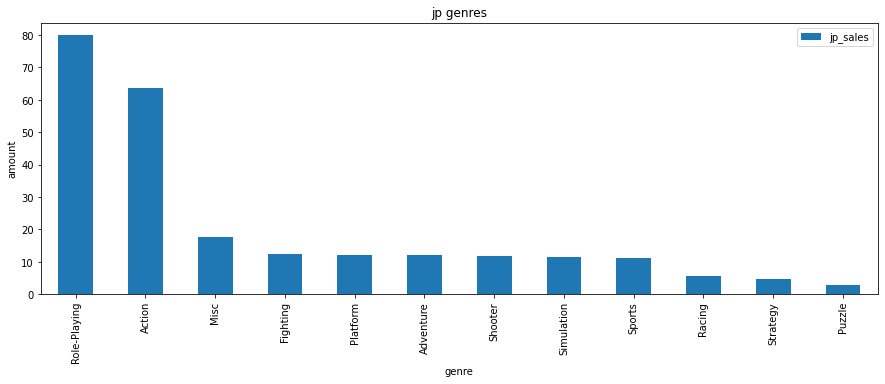

In [42]:
#The top five genres in JP
jp_genre = data.groupby(['genre'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)

jp_genre.head()

genres_jp_pivot = platform_by_year.pivot_table(index='genre',values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'],ascending=False)
genres_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('jp genres')
plt.xlabel('genre')
plt.ylabel('amount')
plt.show()

**Top genres in JP that brings the most money to the counrty, here we can see that Role_playing is the highest.**

,rating,na_sales
0,AO,1.260000
4,K-A,0.853333
5,M,0.478874
1,E,0.324058
7,T,0.256586


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'na ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

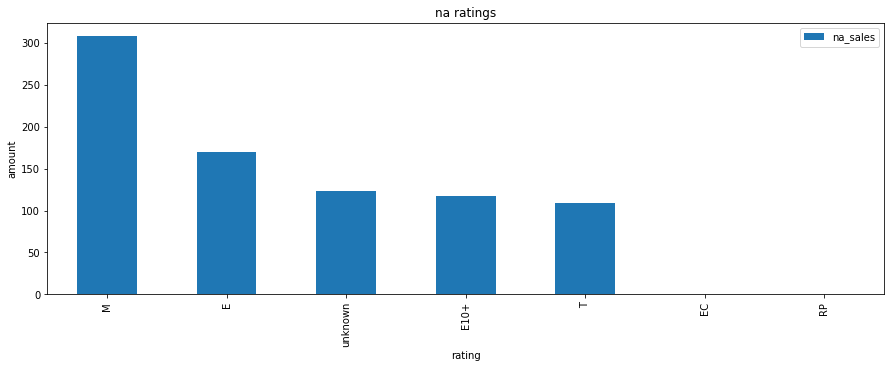

In [43]:
#The top five ratings in NA
na_rating_mean=data.groupby(['rating'])['na_sales'].mean().reset_index().sort_values(by='na_sales',ascending=False)

na_rating_mean.head()

ratings_na_pivot = platform_by_year.pivot_table(index='rating',values='na_sales', aggfunc='sum').sort_values(by=['na_sales'],ascending=False)
ratings_na_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('na ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

**The most common rating in NA is M**

In [44]:
na_rating_sum=data.groupby(['rating'])['na_sales'].sum().reset_index().sort_values(by='na_sales',ascending=False)

na_rating_sum.head()


,rating,na_sales
1,E,1292.99
8,unknown,1240.68
7,T,759.75
5,M,748.48
2,E10+,353.32


,rating,eu_sales
0,AO,0.610000
5,M,0.309642
1,E,0.178008
7,T,0.144218
2,E10+,0.132761


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'eu ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

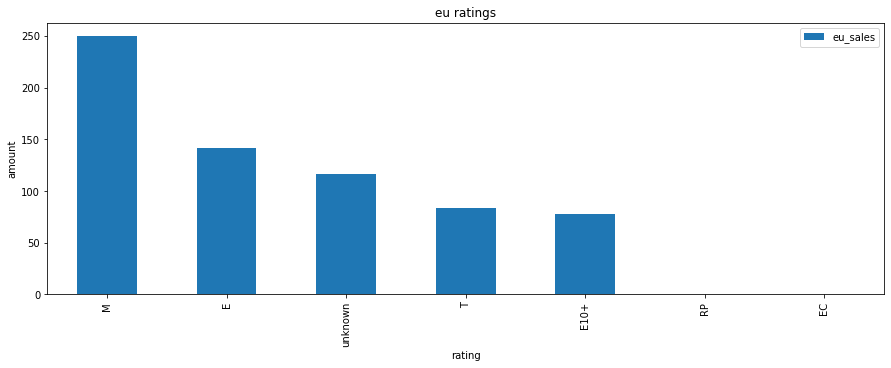

In [45]:
#The top five ratings in EU
eu_rating_mean=data.groupby(['rating'])['eu_sales'].mean().reset_index().sort_values(by='eu_sales',ascending=False)

eu_rating_mean.head()

ratings_eu_pivot = platform_by_year.pivot_table(index='rating',values='eu_sales', aggfunc='sum').sort_values(by=['eu_sales'],ascending=False)
ratings_eu_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('eu ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

**Most common rating in EU is M**

In [46]:
eu_rating_sum=data.groupby(['rating'])['eu_sales'].sum().reset_index().sort_values(by='eu_sales',ascending=False)

eu_rating_sum.head()

,rating,eu_sales
1,E,710.25
8,unknown,613.30
5,M,483.97
7,T,427.03
2,E10+,188.52


,rating,jp_sales
4,K-A,0.486667
8,unknown,0.124472
7,T,0.051131
1,E,0.049652
5,M,0.041100


<AxesSubplot:xlabel='rating'>

Text(0.5, 1.0, 'jp ratings')

Text(0.5, 0, 'rating')

Text(0, 0.5, 'amount')

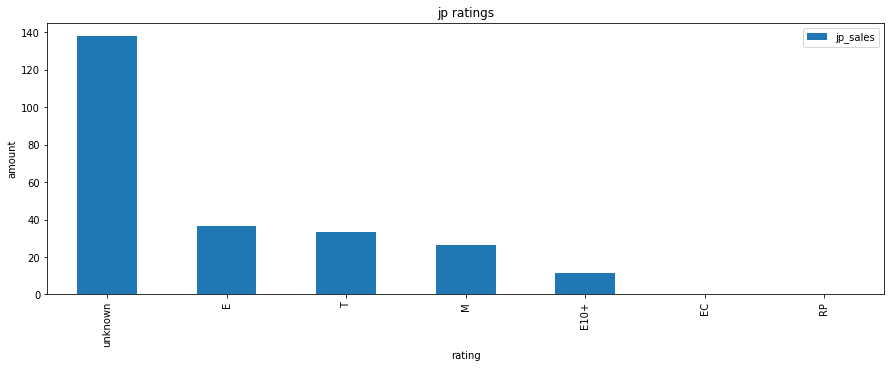

In [47]:
jp_rating_mean=data.groupby(['rating'])['jp_sales'].mean().reset_index().sort_values(by='jp_sales',ascending=False)

jp_rating_mean.head()

ratings_jp_pivot = platform_by_year.pivot_table(index='rating',values='jp_sales', aggfunc='sum').sort_values(by=['jp_sales'],ascending=False)
ratings_jp_pivot.plot(kind = 'bar', figsize=(15,5))
plt.title('jp ratings')
plt.xlabel('rating')
plt.ylabel('amount')
plt.show()

**Most common rating in JP is unknow which are the NULL values.**

In [48]:
jp_rating_sum=data.groupby(['rating'])['jp_sales'].sum().reset_index().sort_values(by='jp_sales',ascending=False)

jp_rating_sum.head()

,rating,jp_sales
8,unknown,841.93
1,E,198.11
7,T,151.40
5,M,64.24
2,E10+,40.20


# Test the following hypotheses:

In [49]:

platform_by_year.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4022 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4022 non-null   object 
 1   platform         4022 non-null   object 
 2   year_of_release  4022 non-null   int64  
 3   genre            4022 non-null   object 
 4   na_sales         4022 non-null   float64
 5   eu_sales         4022 non-null   float64
 6   jp_sales         4022 non-null   float64
 7   other_sales      4022 non-null   float64
 8   critic_score     1812 non-null   float64
 9   user_score       2032 non-null   float64
 10  rating           4022 non-null   object 
 11  sum_sales        4022 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 537.5+ KB


In [50]:
scores_unique = platform_by_year.query('user_score != "NaN"')
test1 = scores_unique['user_score'].mean()
platform_by_year.loc[:, 'user_score']=platform_by_year['user_score'].astype(float)
platform_by_year['user_score'] = platform_by_year['user_score'].fillna(test1)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)
/tmp/ipykernel_133/1997204682.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  platform_by_year['user_score'] = platform_by_year['user_score'].fillna(test1)


In [51]:
xbox = platform_by_year.query('platform=="XOne"')
PC = platform_by_year.query('platform=="PC"')


In [52]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [53]:
st.levene(xbox['user_score'], PC['user_score'], center='mean')

LeveneResult(statistic=10.78560907135631, pvalue=0.0010792166350335308)

In [54]:
xbox_mean = xbox['user_score'].mean()

PC_mean = PC['user_score'].mean()

print(f'xbox mean rating is: {xbox_mean}')
print(f'PC mean rating is: {PC_mean}')

xbox mean rating is: 6.550795171985081
PC mean rating is: 6.489994281723783


In [55]:
alpha = 0.05

test = st.ttest_ind(xbox['user_score'], PC['user_score'], equal_var=False)
print(f'the P-value is:{test.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\'t reject the null hypotheses')

the P-value is:0.5617637404145205
Don't reject the null hypotheses


In [56]:
action = platform_by_year.query('genre == "Action" ')
sports = platform_by_year.query('genre == "Sports" ')


In [57]:
action_mean = action['user_score'].mean()

sports_mean = sports['user_score'].mean()

print(f'action mean rating is: {action_mean}')
print(f'sports mean rating is: {sports_mean}')

action mean rating is: 6.707784161066747
sports mean rating is: 6.0118819960326295


In [58]:
st.levene(action['user_score'], sports['user_score'], center='mean' )

LeveneResult(statistic=103.31816229653441, pvalue=1.3823885622464674e-23)

In [59]:
alpha = 0.05

test = st.ttest_ind(action['user_score'], sports['user_score'], equal_var=False)
print(f'the P-value is:{test.pvalue}')
if test.pvalue < alpha:
    print('Reject the null hypotheses')
else:
    print('Don\t reject the null hypotheses')

the P-value is:5.477723012217744e-18
Reject the null hypotheses


# conclusion

My purpose was to identify patterns that determine whether a game succeeds or not, and to spot big winners and plan advertising campaigns. First I studied the columns - Name ,Platform,	Year_of_Release, Genre, NA_sales, EU_sales, JP_sales,Other_sales, Critic_Score,	User_Score and Rating. Had to fix some issues like missing data, 'tbd' which was also missing value written in another way. I added a column 'sum_sales' so it would be easier for me to do the calculations.
About the project, As I showed in my plots, there were platforms that were more active comparing to those who fade away, those who still active have potintial For example the platform PS3 has been active since 2006, although it has minus but at least it's still active and didn't fade like others. potentially profitable platforms 3DS, PC, PS3, Wii.
I chicked out also wich genres and platforms are leading is specific countries.
Then I had to check 2 hypotheses, that one of them was rejected and the other one didn't. 
